# EDA: Kickstarter

# Introduction

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Importation du fichier:

In [2]:
tableau=pd.read_csv('C:/Users/Baptiste/Downloads/dataset.csv')


# a. Decouverte du dataset

In [3]:
tableau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Il y a 5 flottants, 2 entiers et 8 objets

In [4]:
print(tableau.columns.values)

['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd pledged'
 'usd_pledged_real' 'usd_goal_real']


# b. Valeurs dupliquées et manquantes

In [5]:
duplicated_values = tableau.duplicated().sum()
print(f'Le dataset comporte {duplicated_values} valeurs dupliquées.')

Le dataset comporte 0 valeurs dupliquées.


In [6]:
tableau.isna().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

il y a des valeurs manquantes dans les colonnes name et usd pledged

il y a 98.99725612091027 % des valeurs de usd pledged dans le tabelau
il y a 99.99894364616372 % des valeurs  de name dans le tabelau


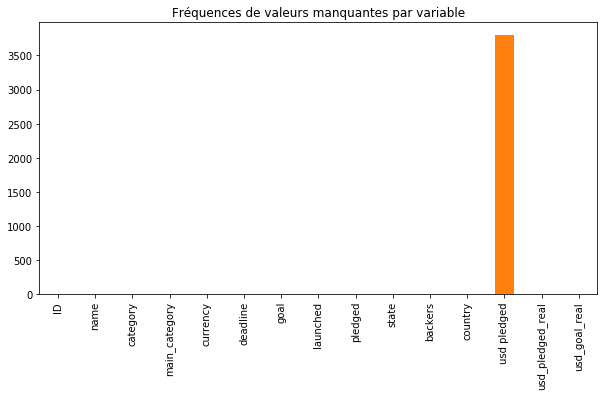

In [7]:
tableau.isna().sum().plot.bar(
    title='Fréquences de valeurs manquantes par variable',
    figsize=(10,5))
print('il y a',tableau['usd pledged'].count() / len(tableau) * 100, '% des valeurs de usd pledged dans le tabelau')
print('il y a',tableau['name'].count() / len(tableau) * 100,'% des valeurs  de name dans le tabelau')

In [8]:
tab_kick=tableau.dropna()


On supprime les lignes où il y a des valeurs manquantes, ces lignes reprèsentent moins de 2% du dataset

# C.Gestion des Outliers

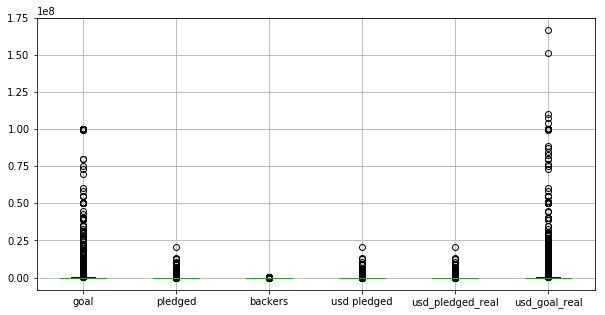

In [9]:
tab_kick.boxplot(['goal','pledged','backers','usd pledged','usd_pledged_real','usd_goal_real'], figsize= (10,5))

On observe qu'il y a quelques valeurs éparpillées mais cela provient de la diversité des différents projets présents sur la plateforme.

Certaines hautes valeurs nous permettrons pas de voir correctement des graphes (boxplot, barplot) avec les paramètres backers, usd_pledged_real et usd_goal_real

In [10]:
tab_kick.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,374860.0,1.074652e+09,6.191368e+08,5971.00,5.380633e+08,1.075289e+09,1.610137e+09,2.147476e+09
goal,374860.0,4.952299e+04,1.189362e+06,0.01,2.000000e+03,5.500000e+03,1.650000e+04,1.000000e+08
pledged,374860.0,9.750538e+03,9.601094e+04,0.00,3.100000e+01,6.200000e+02,4.080000e+03,2.033899e+07
backers,374860.0,1.066884e+02,9.117101e+02,0.00,2.000000e+00,1.200000e+01,5.700000e+01,2.193820e+05
usd pledged,374860.0,7.036802e+03,7.864016e+04,0.00,1.698000e+01,3.947650e+02,3.034425e+03,2.033899e+07
usd_pledged_real,374860.0,9.120899e+03,9.131969e+04,0.00,3.100000e+01,6.244950e+02,4.050895e+03,2.033899e+07
usd_goal_real,374860.0,4.586303e+04,1.158767e+06,0.01,2.000000e+03,5.500000e+03,1.600000e+04,1.663614e+08


On Observe qu'en général la valeur de la moyenne est supérieur à 75% des valeurs, c'est pour cela que si on veut supprimer des valeurs on le fera au dessus de 75%

# I. Etude Uni-varié

# I. a. Etat des projets

35.70693058741931 % des projets réussissent


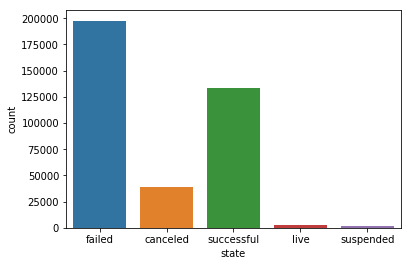

In [11]:
sns.countplot(tab_kick['state'])
perc_success = len(tab_kick[tab_kick['state'] == 'successful']) / len(tab_kick) * 100

print(perc_success,"% des projets réussissent")

On observce que plus de la moitié des projets ne réussissent pas à atteindre leur financement

# I. b. Etude des catégories

Categories in main_category:  15


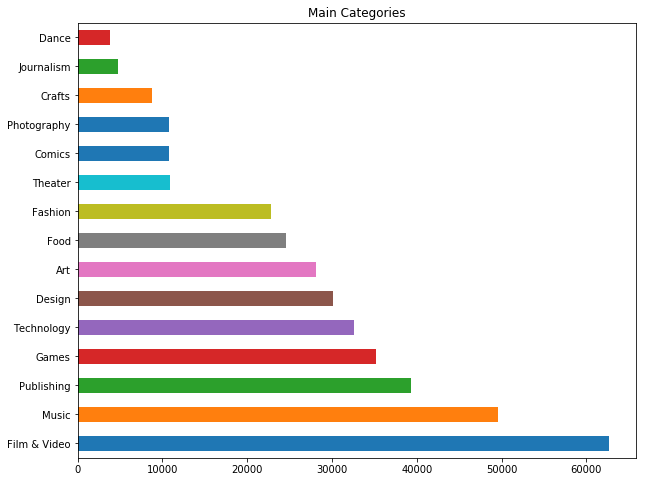

In [12]:
print('Categories in main_category: ', tab_kick['main_category'].nunique())
tab_kick['main_category'].value_counts().plot(kind='barh', 
                                        figsize=(10,8), 
                                        title='Main Categories')

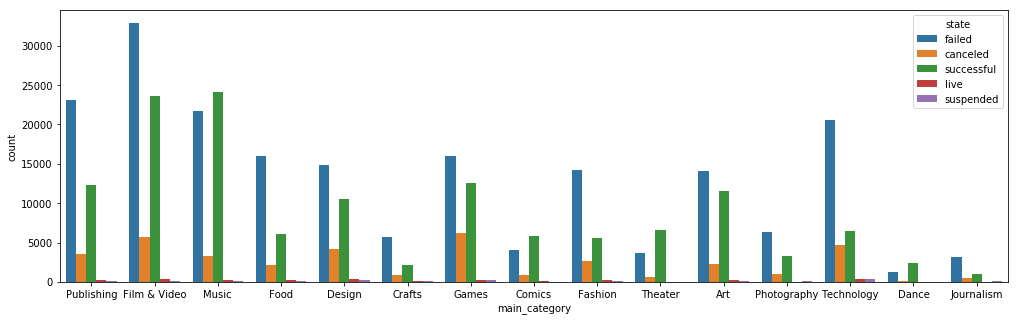

In [13]:
plt.figure(figsize = (17,5))
sns.countplot(tab_kick['main_category'],hue=tab_kick['state'])
plt.show()

# Création d'une colonne pour le pourcentage de financement (usd_gain)

In [14]:
new=(tab_kick['usd_pledged_real']/tab_kick['usd_goal_real'])*100
tab_kick['usd_gain']=new

tab_kick['success'] = [True if i >= 100  else False for i in tab_kick['usd_gain']]
tab_kick

C:\Users\Baptiste\Document\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Baptiste\Document\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,usd_gain,success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0.000000,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,8.070000,False
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0.488889,False
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0.020000,False
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,6.579487,False
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,104.750000,True
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,120.500000,True
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,1.812000,False
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,6.586400,False
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,9.600877,False


On crée aussi une colonne success pour faciliter notre étude





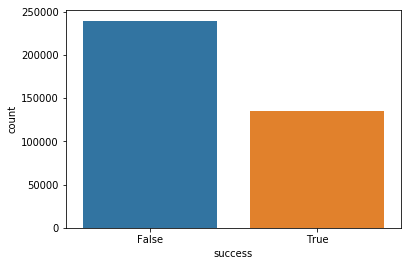

In [15]:
sns.countplot(tab_kick['success'])

Comme vue précedemment on observe qu'il y a moins de la moitié de projets qui réussissent

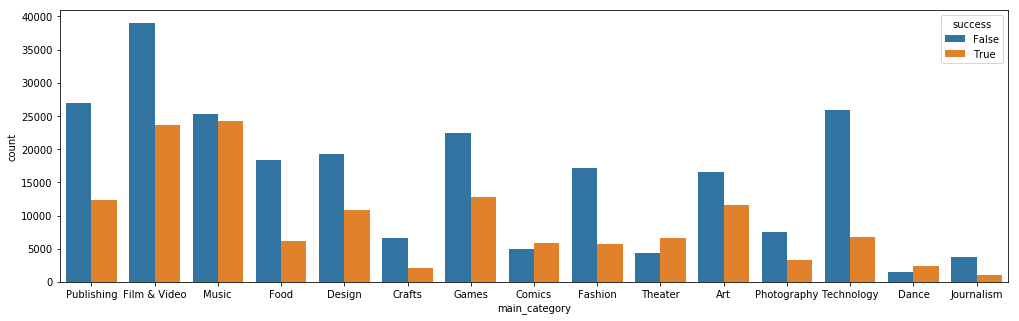

In [16]:
plt.figure(figsize = (17,5))
sns.countplot(tab_kick['main_category'],hue=tab_kick['success'],saturation=0.75)
plt.show()


Les catégories qui ont plus de chance à aboutir sont pour la musqiue,les comics, le theatre et la danse

# I. c. Etude de backers et pledge

# On supprime des valeurs de usd_gain et backers

On supprime les valeurs de usd_gain et backers qui sont au-delà de 75% des valeurs

In [17]:
tab_kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,usd_gain
count,3.748600e+05,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05,3.748600e+05
mean,1.074652e+09,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04,3.263094e+02
std,6.191368e+08,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06,2.682550e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,5.380633e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,4.571429e-01
50%,1.075289e+09,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03,1.342000e+01
75%,1.610137e+09,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04,1.065281e+02
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,1.042779e+07


Ainsi 75% des valeurs se trouvent en-dessous de 106% pour usd_gain et en dessous de 57 pour backers

In [18]:
new_tab_kick1 = tab_kick[np.abs(tab_kick.usd_gain<=120)]
new_tab_kick = new_tab_kick1[np.abs(tab_kick.backers<=100)]
new_tab_kick

C:\Users\Baptiste\Document\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,usd_gain,success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0.000000,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,8.070000,False
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0.488889,False
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0.020000,False
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,6.579487,False
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,1.812000,False
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,6.586400,False
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,9.600877,False
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39,0.000000,False
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00,101.600000,True


In [19]:
print ("il reste ainsi",len(new_tab_kick)/len(tab_kick)*100,"% des valeurs")

il reste ainsi 75.59755642106386 % des valeurs


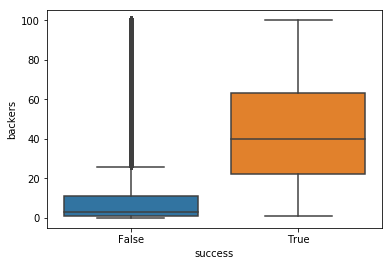

In [20]:
sns.boxplot(x = 'success', y = 'backers', data=new_tab_kick)

On remarque que pour plus de 75% des projets ratés il y a au moins 20 personnes qui soutient ce projet

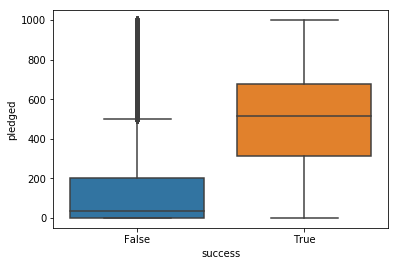

In [21]:
sns.boxplot(x = 'success', y = 'pledged', data=new_tab_kick[new_tab_kick['pledged']<1000])

75% des projets qui ont obtenu au-dessus de 400 USD réussissent

# II Etude Multi-varié

# II. a. Etude en fonction des pays

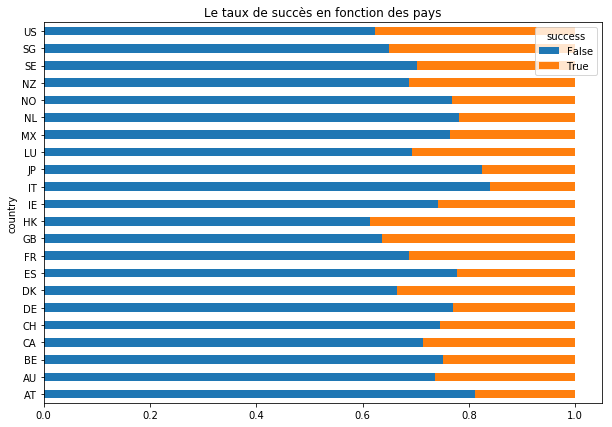

In [22]:
df_data_goal=tab_kick.copy()


category=df_data_goal.groupby('country')
category= category['success'].value_counts(normalize=True).unstack()
category=category.sort_values(by=['country'],ascending=True)
category.plot(kind='barh', stacked=True, figsize=(10,7), title= 'Le taux de succès en fonction des pays')


Les pays ayant un meilleur rapport de succès sont les Etats-Unis(US), Hong Kong(HK), Grande Bretagne(GB),Danemark(DK) et Singapour (SG)
Les pires taux sont au Japon (JP),Italie (IT) et Autriche (AT)

# II. b. Etude en fonction de la monnaie

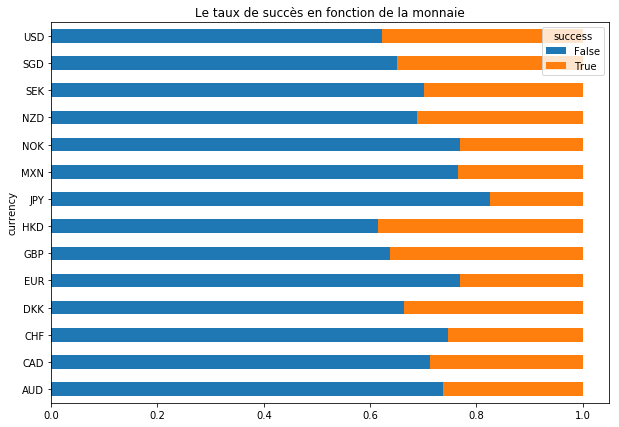

In [23]:

df_data_goal=tab_kick.copy()


category=df_data_goal.groupby('currency')
category= category['success'].value_counts(normalize=True).unstack()
category=category.sort_values(by=['currency'],ascending=True)
category.plot(kind='barh', stacked=True, figsize=(10,7), title= 'Le taux de succès en fonction de la monnaie')


Les monnaies ayant un meilleur taux de réussite sont le Dollars Américain (USD), le Dollar Hong Kongais (HKD),Le Livre (GB)
Les pires taux sont avec le Yen (JPY), l'Euro (EUR) et les monnaies Mexicaines (MXN) et Norvégienne (NOK)

# II. c. Etude de la corrélation

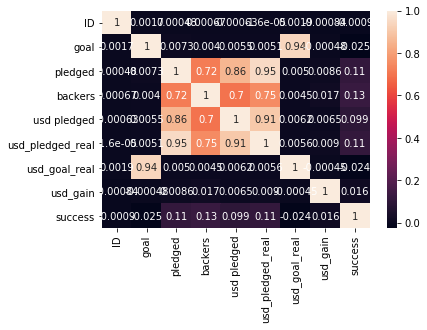

In [24]:
sns.heatmap(tab_kick.corr(), annot=True)

On observe ainsi une corrélation entre les backers et l'usd pledged

# Conclusion

On peut remarquer que les catégories qui ont plus de chance d'aboutir sont les comics, la danse, la musique et le theatre. Les pays qui ont le plus de projets qui réussissent sont les US et la GB et enfin les devises qui ont un meilleur taux de réussite sont le dollars, l'euro et la livre. 

De plus on remarque que plus un projet est soutenu par des personnes (20) et plus l'argent (400 USD) est récupéré, il y a de forte chance que le projet réussisse. Il y aussi une forte corrélation entre ces deux variables.